<a href="https://colab.research.google.com/github/emerson-jose/explorando_base_de_dados_NETFLIX/blob/main/trabalho_explorat%C3%B3ria_da_base_de_dados_da_netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

In [ ]:
#Carregando o dataset
df = pd.read_csv("https://raw.githubusercontent.com/prasertcbs/basic-dataset/master/netflix_titles.csv")


In [ ]:
#visualizar dados
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [ ]:
#Informações gerais
print("Informações gerais:")
print(df.info())

Informações gerais:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB
None


In [ ]:
#Estatísticas básicas
print("\nValores únicos por coluna:")
print(df.nunique())


Valores únicos por coluna:
show_id         6234
type               2
title           6172
director        3301
cast            5469
country          554
date_added      1524
release_year      72
rating            14
duration         201
listed_in        461
description     6226
dtype: int64


In [ ]:
# Limpando valores nulos
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Criando colunas com ano e mês
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

# Removendo registros sem 'type', 'country' ou 'date_added'
df.dropna(subset=['type', 'country', 'date_added'], inplace=True)

In [ ]:

#celulas invalidas
df['date_added'].isna().sum()

np.int64(0)

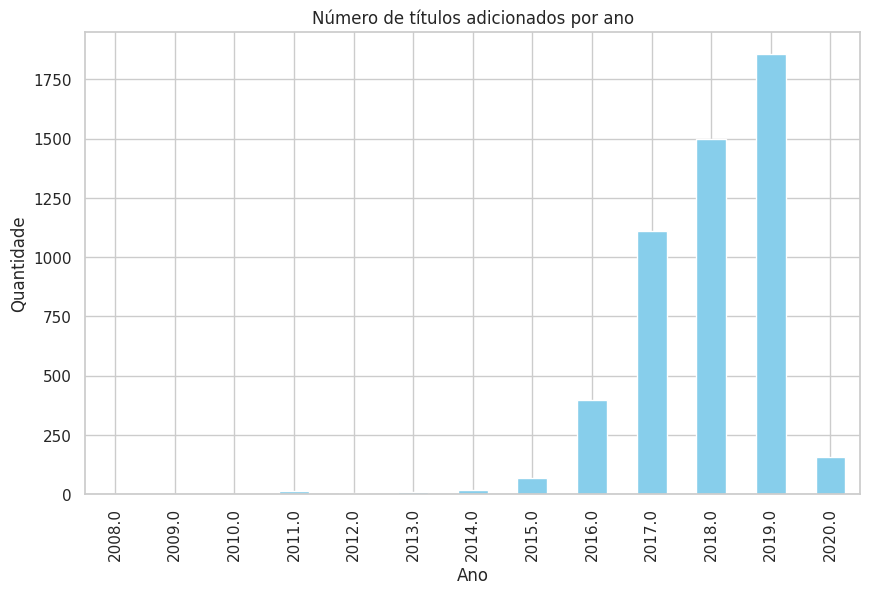

In [ ]:
#Quantos títulos foram adicionados por ano?
q1 = df['year_added'].value_counts().sort_index()
q1.plot(kind='bar', color='skyblue')
plt.title('Número de títulos adicionados por ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade')
plt.show()

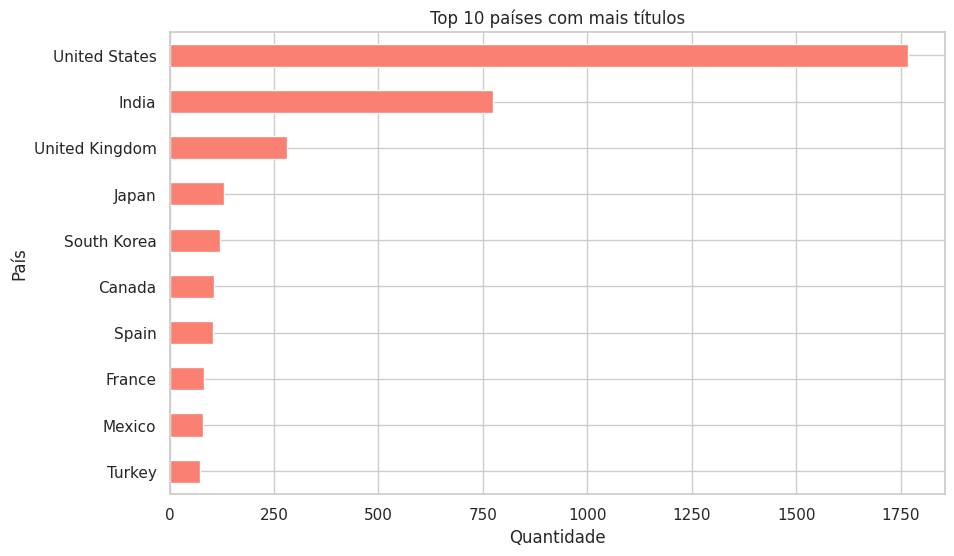

In [ ]:
# 2. Qual o top 10 países com mais produções?
q2 = df['country'].value_counts().head(10)
q2.plot(kind='barh', color='salmon')
plt.title('Top 10 países com mais títulos')
plt.xlabel('Quantidade')
plt.ylabel('País')
plt.gca().invert_yaxis()
plt.show()

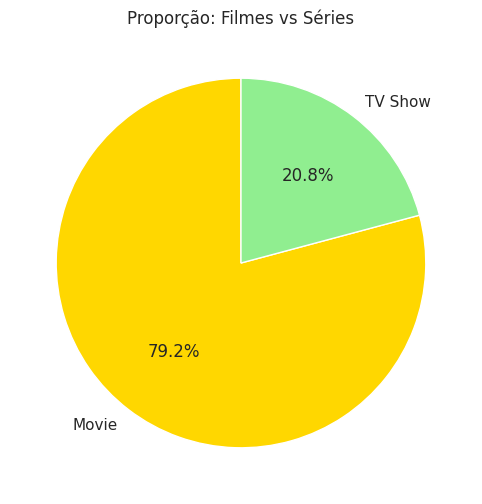

In [ ]:
# 3. Qual a proporção de Filmes vs Séries?
q3 = df['type'].value_counts()
q3.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['gold', 'lightgreen'])
plt.title('Proporção: Filmes vs Séries')
plt.ylabel('')
plt.show()

<ipython-input-14-516818479>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=q4.values, y=q4.index, palette='muted')


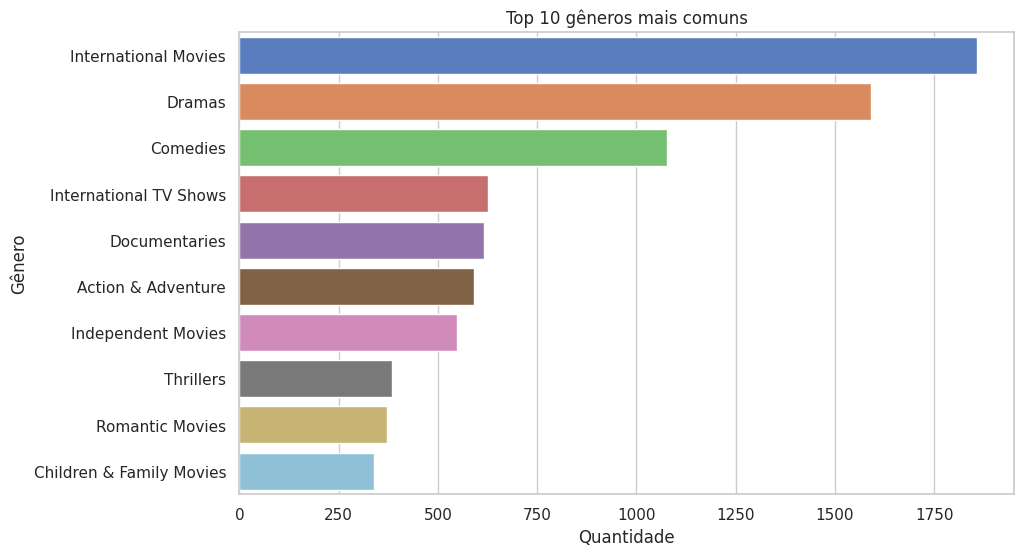

In [ ]:
# 4. Quais são os gêneros mais comuns?
q4 = df['listed_in'].str.split(', ', expand=True).stack().value_counts().head(10)
sns.barplot(x=q4.values, y=q4.index, palette='muted')
plt.title('Top 10 gêneros mais comuns')
plt.xlabel('Quantidade')
plt.ylabel('Gênero')
plt.show()

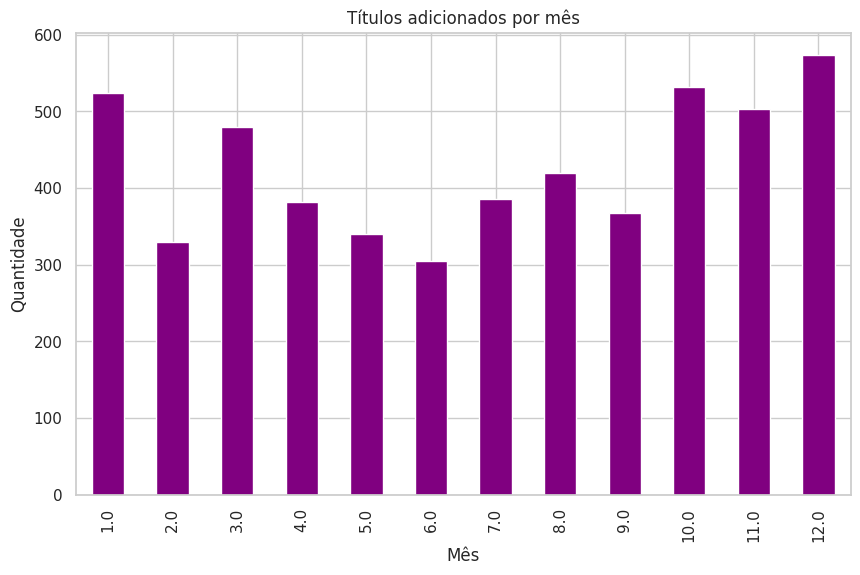

In [ ]:
# 5. Títulos adicionados por mês (tendência mensal)
q5 = df['month_added'].value_counts().sort_index()
q5.plot(kind='bar', color='purple')
plt.title('Títulos adicionados por mês')
plt.xlabel('Mês')
plt.ylabel('Quantidade')
plt.show()

In [ ]:
# 6. Duração média de filmes vs séries
df_filmes = df[df['type'] == 'Movie']
df_series = df[df['type'] == 'TV Show']

In [ ]:
# Extrair minutos dos filmes
df_filmes['duration_min'] = df_filmes['duration'].str.extract('(\d+)').astype(float)
print("Duração média dos filmes:", df_filmes["duration_min"].mean())

Duração média dos filmes: 100.19164619164619


<ipython-input-19-932596644>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filmes['duration_min'] = df_filmes['duration'].str.extract('(\d+)').astype(float)


In [ ]:
# Número de temporadas por série
df_series['seasons'] = df_series['duration'].str.extract('(\d+)').astype(float)
print("Média de temporadas por série:", df_series['seasons'].mean())

Média de temporadas por série: 1.0


<ipython-input-20-4094765365>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_series['seasons'] = df_series['duration'].str.extract('(\d+)').astype(float)


<ipython-input-22-2739994098>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=q7.values, y=q7.index, palette='coolwarm')


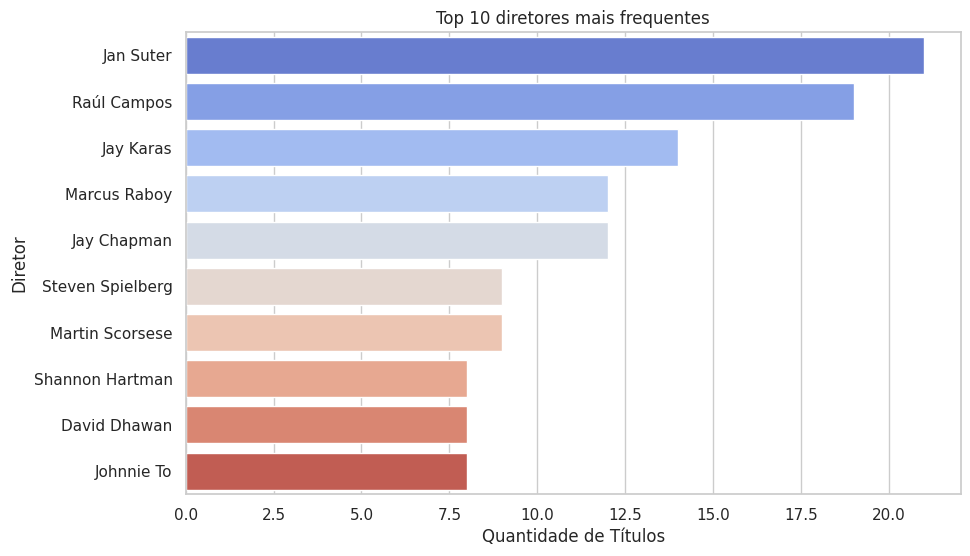

In [ ]:
# 7. Diretores mais frequentes
q7 = df['director'].dropna().str.split(', ', expand=True).stack().value_counts().head(10)
sns.barplot(x=q7.values, y=q7.index, palette='coolwarm')
plt.title('Top 10 diretores mais frequentes')
plt.xlabel('Quantidade de Títulos')
plt.ylabel('Diretor')
plt.show()

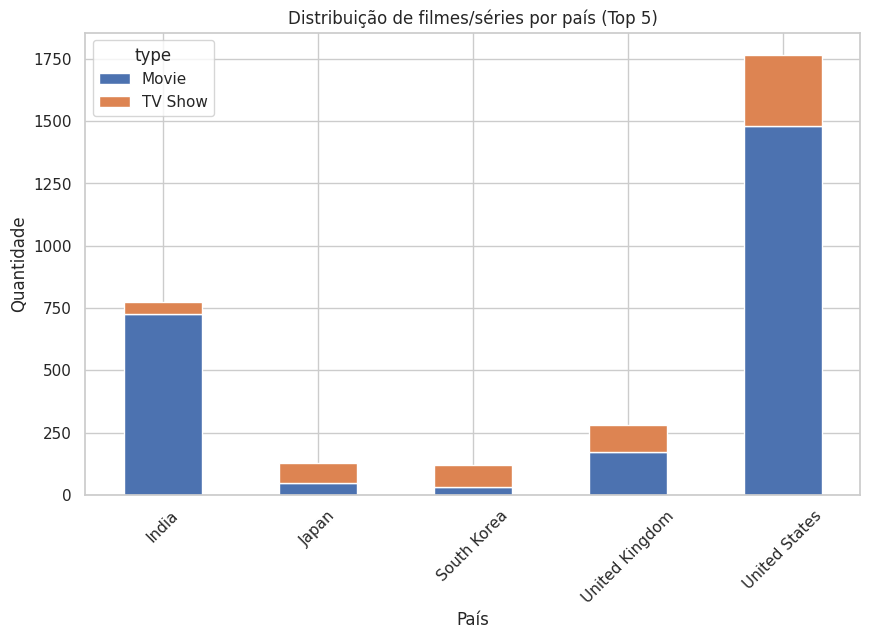

In [ ]:
# 8. Distribuição dos tipos de conteúdo por país
top_paises = df['country'].value_counts().head(5).index
q8 = df[df['country'].isin(top_paises)].groupby(['country', 'type']).size().unstack().fillna(0)
q8.plot(kind='bar', stacked=True)
plt.title('Distribuição de filmes/séries por país (Top 5)')
plt.ylabel('Quantidade')
plt.xlabel('País')
plt.xticks(rotation=45)
plt.show()